In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('../../datasets/kickstarter.csv', nrows=10000)

In [44]:
# Configuraciones generales de Pandas
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
pd.set_option('display.latex.repr', True)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.width', None)

In [45]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000


In [46]:
data.shape

(10000, 15)

In [47]:
data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [48]:
# Explorando las columnas
data.state.value_counts()

failed        5204
successful    3565
canceled      1006
undefined       96
live            83
suspended       46
Name: state, dtype: int64

In [49]:
# Porcentaje de proyectos de cada grupo
data.state.value_counts(normalize=True)

failed       0.5204
successful   0.3565
canceled     0.1006
undefined    0.0096
live         0.0083
suspended    0.0046
Name: state, dtype: float64

In [50]:
# el 52% han sido fallidos y el 35% exitoso, las otras clasificaciones no aportan al modelo por lo que las eliminaremos
df_classify = data[data.state.isin(['failed','successful'])]
df_classify.state.value_counts(normalize=True)

failed       0.5935
successful   0.4065
Name: state, dtype: float64

In [51]:
# Evaluar columna main_category
df_classify.main_category.value_counts()

Film & Video    1506
Music           1243
Publishing       910
Games            801
Art              705
Design           682
Technology       681
Food             561
Fashion          504
Theater          277
Comics           268
Photography      241
Crafts           203
Journalism        98
Dance             89
Name: main_category, dtype: int64

In [52]:
# usemos la función crosstab para ver que tan exitosos son los proyectos de cada categoría
pd.crosstab(df_classify.main_category, df_classify.state)

state,failed,successful
main_category,,
Art,382,323
Comics,108,160
Crafts,147,56
Dance,34,55
Design,399,283
Fashion,360,144
Film & Video,888,618
Food,394,167
Games,452,349


In [53]:
# agregamos la tasa de exito de cada categoria 
category_crosstab = pd.crosstab(df_classify.main_category, df_classify.state)
category_crosstab['success_rate'] = category_crosstab.successful/(category_crosstab.successful + category_crosstab.failed)
category_crosstab

state,failed,successful,success_rate
main_category,,,
Art,382,323,0.4582
Comics,108,160,0.5970
Crafts,147,56,0.2759
Dance,34,55,0.6180
Design,399,283,0.4150
Fashion,360,144,0.2857
Film & Video,888,618,0.4104
Food,394,167,0.2977
Games,452,349,0.4357


In [54]:
# exploremos la variable de moneda
df_classify.currency.value_counts()

USD    6834
GBP     821
EUR     421
CAD     351
AUD     154
MXN      51
SEK      47
NZD      24
HKD      16
DKK      15
CHF      15
NOK      10
SGD      10
Name: currency, dtype: int64

In [55]:
# agregamos la tasa de uso de cada moneda
currency_crosstab = pd.crosstab(df_classify.currency, df_classify.state)
currency_crosstab['success_rate'] = currency_crosstab.successful/(currency_crosstab.successful + currency_crosstab.failed)
currency_crosstab.sort_values(by='success_rate', ascending=False)

state,failed,successful,success_rate
currency,,,
CHF,7,8,0.5333
NOK,5,5,0.5000
USD,3933,2901,0.4245
SGD,6,4,0.4000
GBP,493,328,0.3995
HKD,10,6,0.3750
NZD,15,9,0.3750
SEK,30,17,0.3617
CAD,231,120,0.3419


In [56]:
# veamos la distribución de la duración del proyecto tanto para proyectos exitos como fallidos
df_classify = df_classify.copy()
df_classify['launched_date'] = pd.to_datetime(df_classify.launched)
df_classify['deadline_date'] = pd.to_datetime(df_classify.deadline)
df_classify['duration'] = (df_classify.deadline_date - df_classify.launched_date).dt.days
df_classify

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500,2015-08-11 12:12:28,2015-10-09,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000,2017-09-02 04:43:57,2017-11-01,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000,2013-01-12 00:20:50,2013-02-26,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000,2012-03-17 03:24:11,2012-04-16,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0000,2016-02-26 13:38:27,52375.0000,successful,224,US,52375.0000,52375.0000,50000.0000,2016-02-26 13:38:27,2016-04-01,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1050347889,Autism Hero Designs Project,Graphic Design,Design,USD,2015-11-25,3620.0000,2015-10-26 19:38:24,4435.0000,successful,73,US,4435.0000,4435.0000,3620.0000,2015-10-26 19:38:24,2015-11-25,29
9995,1050352242,Flowerfish Games,Video Games,Games,USD,2017-04-07,2500.0000,2017-02-06 22:34:24,0.0000,failed,0,US,0.0000,0.0000,2500.0000,2017-02-06 22:34:24,2017-04-07,59
9996,1050355782,SPNIME: The Supernatural / Anime Fanbook,Art,Art,USD,2015-04-20,1350.0000,2015-03-18 03:43:41,2391.0000,successful,57,US,2391.0000,2391.0000,1350.0000,2015-03-18 03:43:41,2015-04-20,32
9998,1050358230,frog: across the pond,Documentary,Film & Video,USD,2016-01-24,3000.0000,2015-12-24 01:06:19,5293.0000,successful,60,US,5293.0000,5293.0000,3000.0000,2015-12-24 01:06:19,2016-01-24,30


<AxesSubplot:>

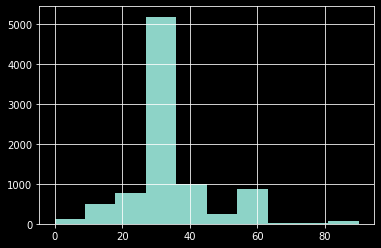

In [57]:
# histograma de duraciones de proyectos
df_classify.duration.hist()

array([<AxesSubplot:title={'center':'failed'}>,
       <AxesSubplot:title={'center':'successful'}>], dtype=object)

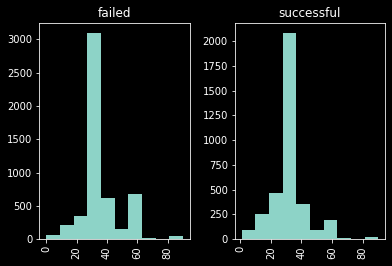

In [58]:
# proyectos exitos vs fallidos
df_classify.duration.hist(by=df_classify.state)

In [59]:
# el comportamiento es el mismo en relación al tiempo duran un la mayoría dura un mes

<AxesSubplot:>

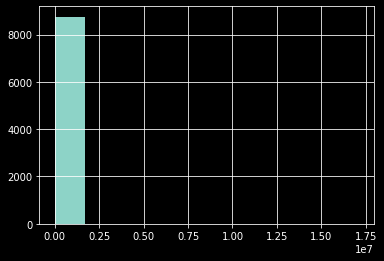

In [60]:
# revisemos el uso de DLS 
df_classify.usd_goal_real.hist()

<AxesSubplot:>

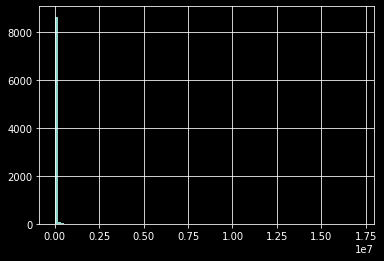

In [61]:
# al parecer hay algun outlier que impide ver la distribución correcta, agreguemos unos bins
df_classify.usd_goal_real.hist(bins=100)


<AxesSubplot:>

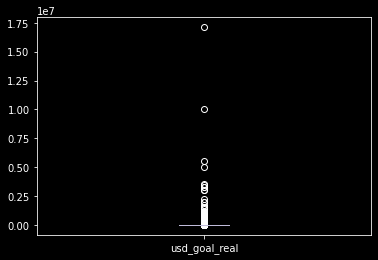

In [62]:
# no es suficiente, siguen habiendo datos extraños revisemos más a detalles
df_classify.usd_goal_real.plot.box()


In [63]:
# veamos los proyectos que piden más de 1 millon de dolares
df_classify[df_classify.usd_goal_real>1000000]


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
340,1001542282,You in a novel,Publishing,Publishing,EUR,2015-11-09,1000000.0000,2015-09-10 23:03:21,10.0000,failed,1,IT,11.1800,10.7600,1076403.0900,2015-09-10 23:03:21,2015-11-09,59
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.0000,2017-08-19 22:13:55,2242.0000,failed,19,CA,1160.6700,1794.4600,1600768.3700,2017-08-19 22:13:55,2017-10-18,59
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,3000000.0000,2014-08-15 20:16:22,4.0000,failed,2,US,4.0000,4.0000,3000000.0000,2014-08-15 20:16:22,2014-10-14,59
1144,1005820080,The Million Pound Shirt,Fashion,Fashion,GBP,2015-11-25,1000000.0000,2015-10-21 22:00:04,10.0000,failed,1,GB,15.4700,15.0500,1505185.3600,2015-10-21 22:00:04,2015-11-25,34
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0000,2014-06-21 22:34:21,285.0000,failed,5,CA,263.4100,264.6700,3575408.6200,2014-06-21 22:34:21,2014-07-21,29
2920,1015071175,Thermal Safe,Product Design,Design,USD,2015-06-10,2000000.0000,2015-04-22 03:54:47,665.0000,failed,8,US,665.0000,665.0000,2000000.0000,2015-04-22 03:54:47,2015-06-10,48
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.0000,2015-07-07 21:14:52,0.0000,failed,0,IT,0.0000,0.0000,5568982.9900,2015-07-07 21:14:52,2015-09-01,55
3140,1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.0000,2016-02-27 13:08:01,15.0000,failed,6,ES,16.5900,17.1000,17104542.9700,2016-02-27 13:08:01,2016-04-27,59
3271,1016899157,Musée du cirque Gilles MAIGNANT : NICE CIRCUS ...,Performance Art,Art,EUR,2015-10-25,1000000.0000,2015-08-26 19:38:53,100.0000,failed,1,FR,115.3400,110.1700,1101697.7200,2015-08-26 19:38:53,2015-10-25,59
3293,1017011422,Electric Car,Technology,Technology,MXN,2017-09-13,40000000.0000,2017-08-19 01:19:23,510.0000,failed,2,MX,0.0000,28.8700,2263980.0800,2017-08-19 01:19:23,2017-09-13,24


In [64]:
# vemos el desgloce de exitos
df_classify[df_classify.usd_goal_real>1000000].state.value_counts()

failed    23
Name: state, dtype: int64

In [65]:
# son 11 proyectos fallidos, dado que los datos parecen legitimos mantendremos los registros en el dataset
df_classify.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.0000,0.0110,0.0051,-0.0015,-0.0011,0.0031,0.0134,0.0232
goal,0.0110,1.0000,0.0189,0.0145,0.0186,0.0172,0.5519,0.0317
pledged,0.0051,0.0189,1.0000,0.8033,0.8421,0.9731,0.0357,0.0046
backers,-0.0015,0.0145,0.8033,1.0000,0.8035,0.8226,0.0328,0.0030
usd pledged,-0.0011,0.0186,0.8421,0.8035,1.0000,0.8600,0.0399,0.0012
usd_pledged_real,0.0031,0.0172,0.9731,0.8226,0.8600,1.0000,0.0370,0.0054
usd_goal_real,0.0134,0.5519,0.0357,0.0328,0.0399,0.0370,1.0000,0.0640
duration,0.0232,0.0317,0.0046,0.0030,0.0012,0.0054,0.0640,1.0000


<AxesSubplot:>

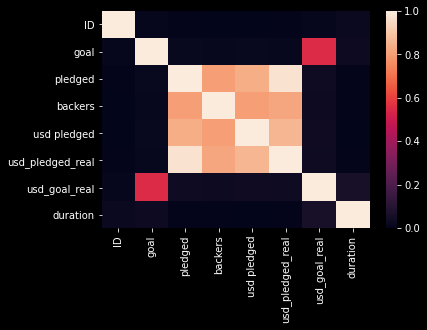

In [66]:
sns.heatmap(df_classify.corr())

In [67]:
df_classify.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         5
usd_pledged_real    0
usd_goal_real       0
launched_date       0
deadline_date       0
duration            0
dtype: int64

In [68]:
# la unica columna que contiene nullos es usd pledged

In [ ]:
df_classify.drop('usd pledged', axis=1, inplace=True)
df_classify.info()

In [69]:
# preparando datos para aplicar algoritmos ML
# seleccionamos las columnas a incluir en el modelo
df_variables = df_classify[['usd_goal_real','backers','main_category','duration','currency']]
df_variables.head()

,usd_goal_real,backers,main_category,duration,currency
0,1533.9500,0,Publishing,58,GBP
1,30000.0000,15,Film & Video,59,USD
2,45000.0000,3,Film & Video,44,USD
3,5000.0000,1,Music,29,USD
5,50000.0000,224,Food,34,USD


In [70]:
# Convertimos las variables categoricas a variables ficticias o dummies
X = pd.get_dummies(data=df_variables, columns=['main_category','currency'], drop_first=True)
X.head()


,usd_goal_real,backers,duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.9500,0,58,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,30000.0000,15,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,45000.0000,3,44,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5000.0000,1,29,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,50000.0000,224,34,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
# genermos columnas dummies para el dato categorico de estado
y = pd.get_dummies(data = df_classify.state, drop_first=True)
y.head()

,successful
0,0
1,0
2,0
3,0
5,1


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Dado que es un problema de clasificación podemos utilizar los siguientes algortmos
## Regresión Logistica
## Bosque Aleatorio
## SVM (no recomendado para datasets con mas de 10000 registros)


In [73]:
# Creamos el modelo
from sklearn.linear_model import LogisticRegression
ks_model = LogisticRegression().fit(X_train, y_train)

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [74]:
# Validamos el modelo 
# aplicando una matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred_test = ks_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[984,  40],
       [127, 603]], dtype=int64)

# Interpretación de la matriz de confusión
## [Entradas clasificadas correctamente como 0 o falla     -     Entradas clasificadas incorrectamente como 1 o exito
## Entradas clasificadas incorrectamente como 0 o fallas  -     Entradas clasificadas correctamente como 1 o exitos]

### El objetivo maximizar la primera y la última entrada y minimizar las entradas clasificadas incorrectamente

### en nuestro ejemplo se clasificó correctamente el 89.4%



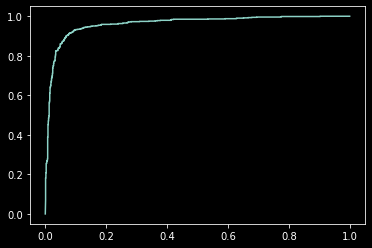

In [75]:
# Evaluamos el modelo utilizando la curva ROC (cuanto mayor es el área bajo la curva el algoritmo es más preciso)
from sklearn import metrics
y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [76]:
# Accuray Score
auc

0.9618083797089041

In [77]:
# el área bajo la curva es superior al 95% lo cual es un buen indicador de que el modelo funciona correctamente
# auqnue es posible mejorar ese numero con un algoritmo diferente

In [78]:
# Bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
ks_rf = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-78-b3ef4208de55>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ks_rf = RandomForestClassifier().fit(X_train, y_train)


In [79]:
# generamos la matriz de confusión
y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[958,  66],
       [ 69, 661]], dtype=int64)

In [80]:
# el 91.25% de las entradas fueron clasificadas correctamente

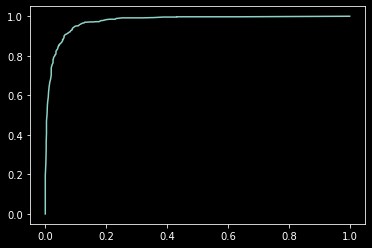

In [81]:
# trazamos la curva ROC para el bosque aleatorio que hemos creado
y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr)

In [82]:
# Acuraccy es modelo de random forest es mejor opción al mejorar en 2 puntos porcentules la evaluación del modelo.
auc

0.9750856164383561